In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Classifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Tuning
from sklearn.grid_search import RandomizedSearchCV

# Scoring
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [65]:
sns.set_style(style='darkgrid')

In [66]:
df = pd.read_csv("diamonds.csv")

In [67]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [68]:
df = df.drop('Unnamed: 0', axis=1)

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font size="5">Let's describe the different columns of our dataset</font>

 - **Carat**: weight of the diamond
 - **Cut**: quality of the cut
     - In order: Fair, Good, Very Good, Premium, Ideal
 - **Color**: color of the diamond
    - In order: D being the best and J being the worst
 - **Clarity**: measurement of how clear the diamond is
     - In order: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
 - **Depth**: total depth percentage
 - **Table**: width of top of diamond relative to widest point (table percentage)
 - **X, Y, Z**: the dimensions of the diamond in mm


### Check for missing values

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Why are the minimum values of x, y, and z 0? That doesn't make any sense. So, let's drop those data points. 

In [72]:
len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

20

In [73]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

In [74]:
len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

0

<font size="3">Get a basic overview of the features and their relationship to our target</font>

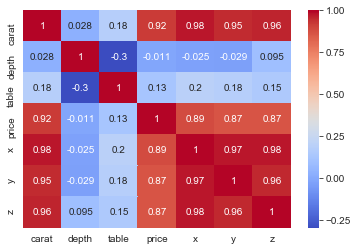

In [75]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<font size="5">What have we learned from this?</font>
<ul>
    <li>Carat has a strong positive correlation with Price</li>
    <li>Depth has a weak negative correlation with Price</li>
    <li>Table has a weak positive correlation with Price</li>
    <li>Dimensions (X, Y, Z) has a strong positive correlation with Price</li>
</ul>

C:\Users\Ethan\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


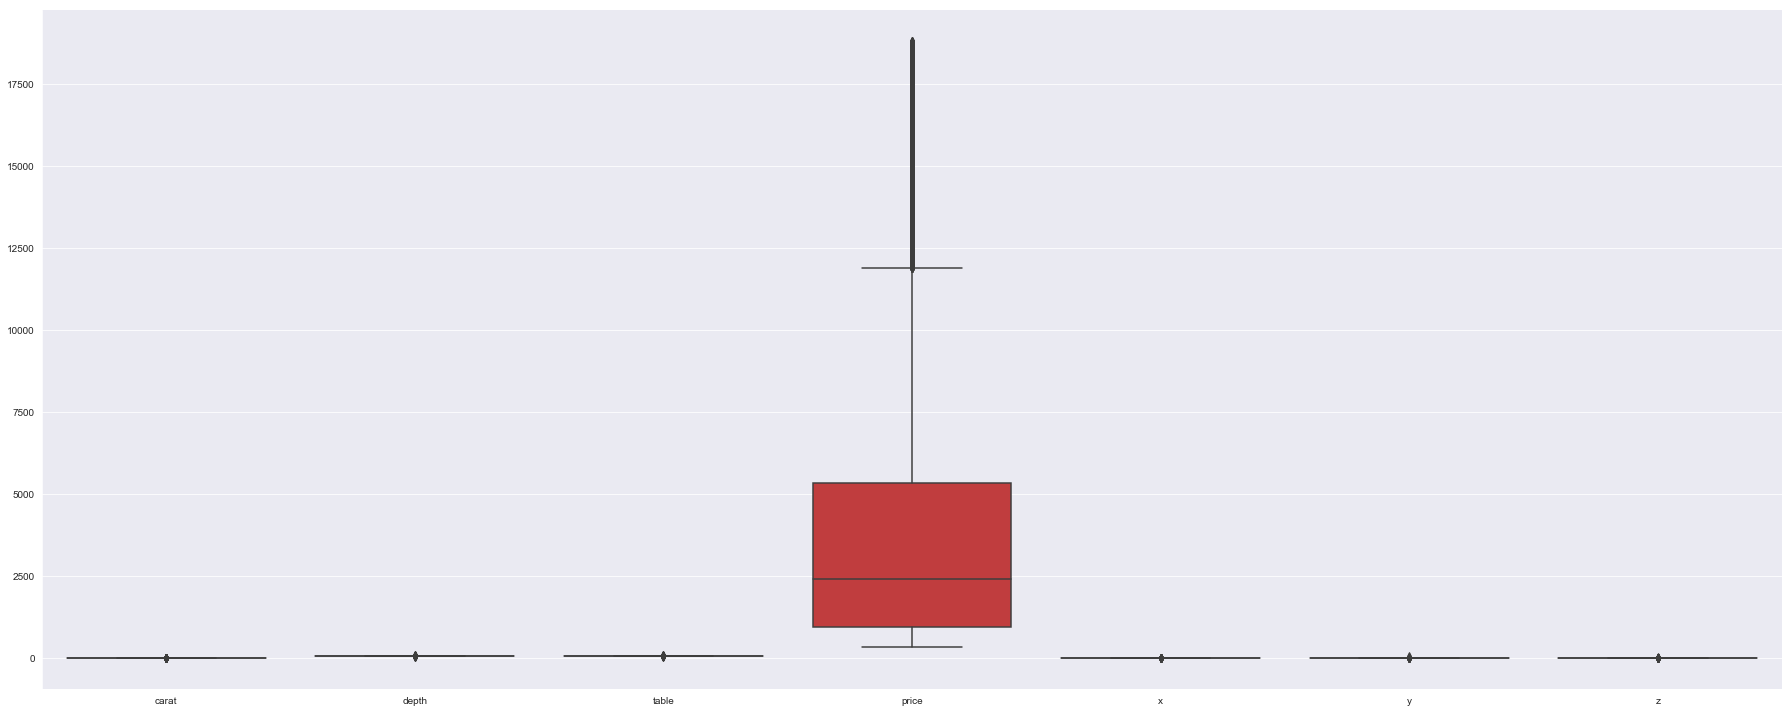

In [76]:
sns.catplot(data=df, kind='box', size=10, aspect=2.5)

<p>All of our features are on a small scale</p>

<font size="5">Now, let's look at each individual feature and its relationship with price</font>
<h3>Carat</h3>

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


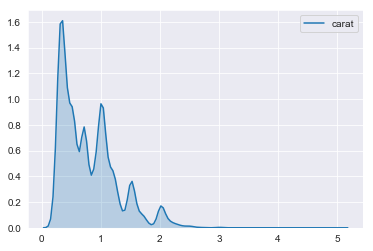

In [77]:
sns.kdeplot(df['carat'], shade=True)

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


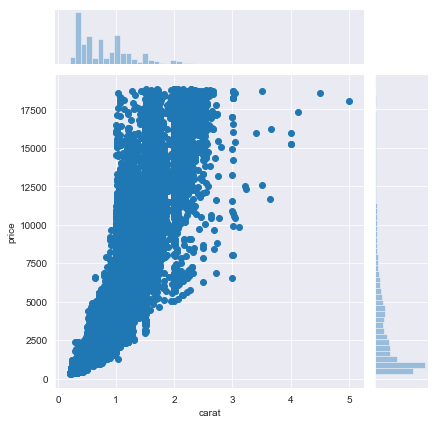

In [78]:
sns.jointplot(df['carat'], df['price'])

<p>We can see that there is an exponential relationship between carat and price</p>

<h3>Cut</h3>

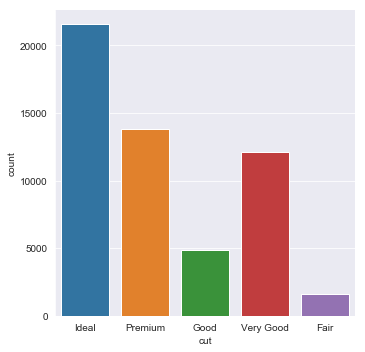

In [79]:
sns.catplot(x='cut', data=df, kind='count')

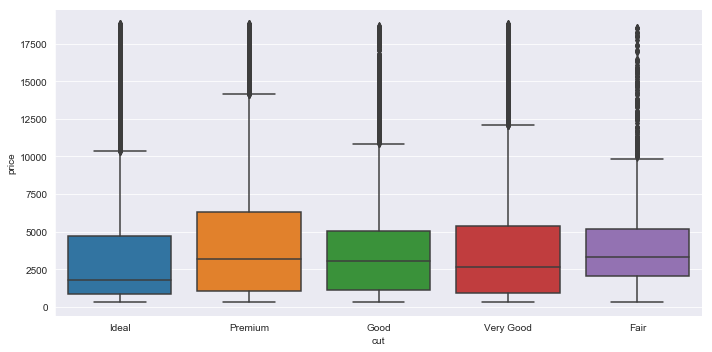

In [80]:
sns.catplot(x='cut', y='price', data=df, kind='box', height=5, aspect=2)

<font size="5">Let's understand what the Cut means. (In Order of Best to Worst)</font>
<ol>
    <li>Premium</li>
    <li>Ideal</li>
    <li>Very Good</li>
    <li>Good</li>
    <li>Fair</li>
</ol>
<font size="3">Our premium cut costs the most as expected, and our Very Good comes second.</font>
<p></p>
<a href="https://www.bluenile.com/education/diamonds/cut">Information from BlueNile</a>

<h3>Color</h3>

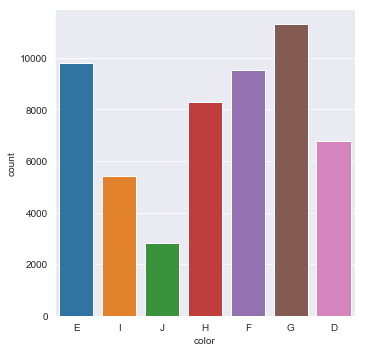

In [81]:
sns.catplot(x='color', data=df, kind='count')

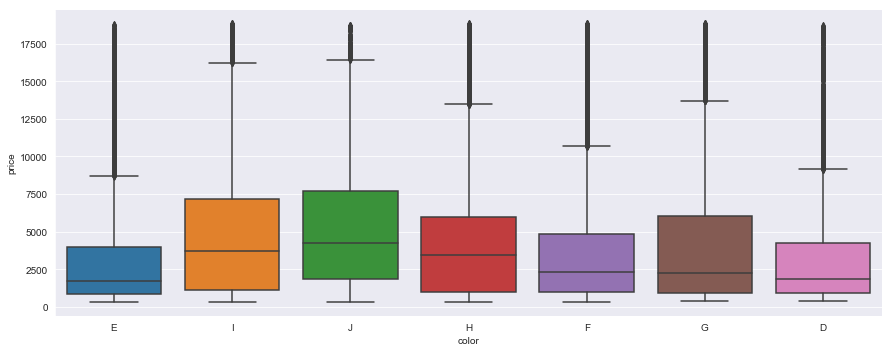

In [82]:
sns.catplot(x='color', y='price', data=df, kind='box', aspect=2.5)

<font size="5">Let's understand what the color labels mean.</font>
<ul>
    <li>D-F are colorless diamonds (Highest Quality)</li>
    <li>G & H are diamonds with faint color (Best Value)</li>
    <li>I & J are naturally colored diamonds (Great with Yellow Gold)</li>
</ul>
<font size="3">Although the colorless diamonds are considered to be the highest quality, naturally colored diamonds only occur every 1 in 10,000 diamonds, and therefore can sometimes cost more than colorless diamonds. Our data here supports that, with the max and mean values of the I & J being higher than D-F. It actually looks like our D-F data points are the lowest overall prices compared to the other colors. This shows us that price doesn't directly effect the price.</font>
<p></p>
<a href="https://www.bluenile.com/education/diamonds/color">Information from BlueNile</a>

<h3>Clarity</h3>

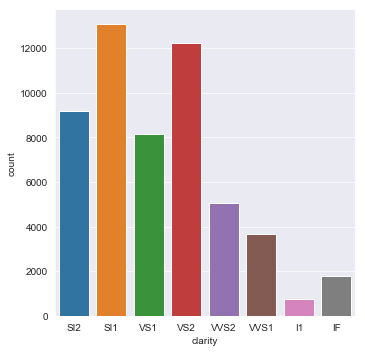

In [83]:
sns.catplot(x='clarity', data=df, kind='count')

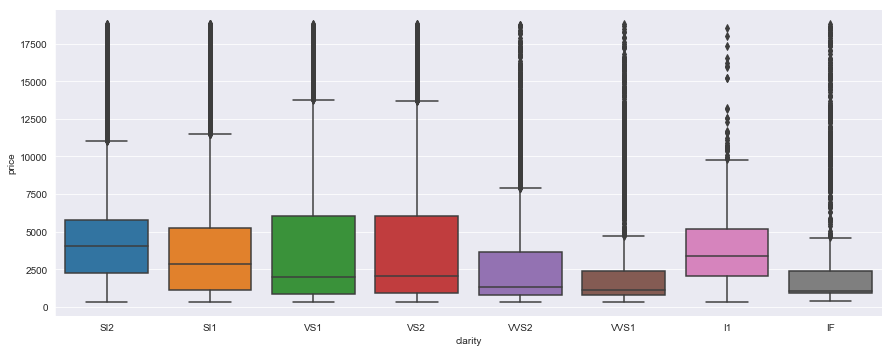

In [84]:
sns.catplot(x='clarity', y='price', data=df, kind='box', aspect=2.5)

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


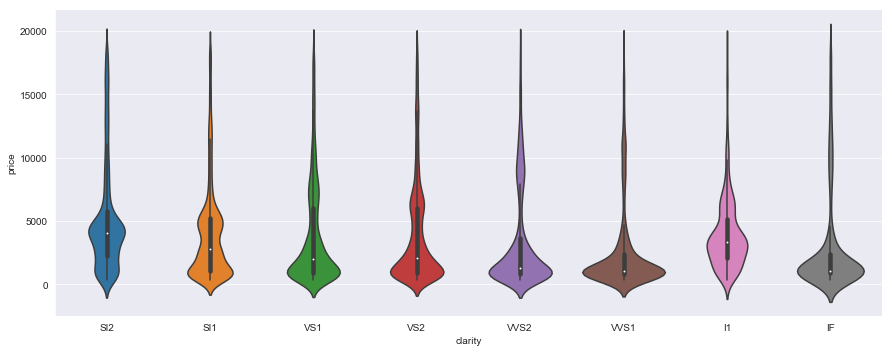

In [85]:
sns.catplot(x='clarity', y='price', data=df, kind='violin', aspect=2.5)

<font size="5">Let's understand what the clarity labels mean.</font>
<ul>
    <li>IF - Inclusions aren’t visible in internally flawless diamonds under 10x magnification.</li>
    <li>VVS - diamonds have miniscule inclusions that are difficult even for trained eyes to see under 10x magnification. </li>
    <li>VS & SI - diamonds have minor inclusions that cannot be seen without 10x magnification.</li>
</ul>
<font size="3">Although IF diamonds are the rarest, we can see that most of the datapoints lie closer to the bottom of the spectrum. Therefore, we can determine that clarity doesn't influence price as much as color, carat, or cut.</font>
<p></p>
<a href="https://www.bluenile.com/education/diamonds/clarity">Information from BlueNile</a>

<h3>Depth</h3>

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


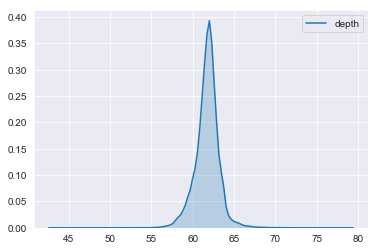

In [86]:
sns.kdeplot(data=df['depth'], shade=True)

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


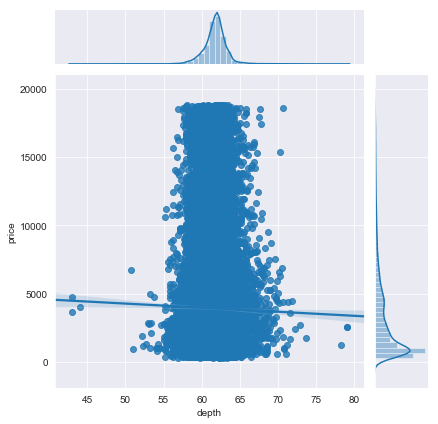

In [87]:
sns.jointplot(x='depth', y='price', data=df, kind='reg')

<font size="5">Let's understand what the depth values mean.</font>
<p>Depth is the distance from the table to the point of the diamond</p>
<font size="3">"When discussing depth in terms of cut quality, it is described in percentages. To find the depth percentage, divide the diamond’s physical depth measurement by its width. 56.5 and 65 percent considered good. However, the ideal depth is between 62.9 and 59.5 percent."</font>
<p></p>
<font size="5">We can see that our depth has a normal distribution and the price of the diamond varies for the same depth. Our regression line also shows that there is a slight decrease in price as depth percentage increases.</font>
<p></p>
<a href="https://www.brilliance.com/diamonds/ideal-depth-table-round-cut-diamonds">Information from Brilliance</a>

<h3>Table</h3>

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


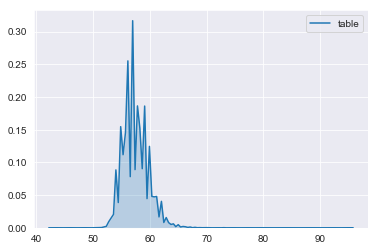

In [88]:
sns.kdeplot(data=df['table'], shade=True)

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ethan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


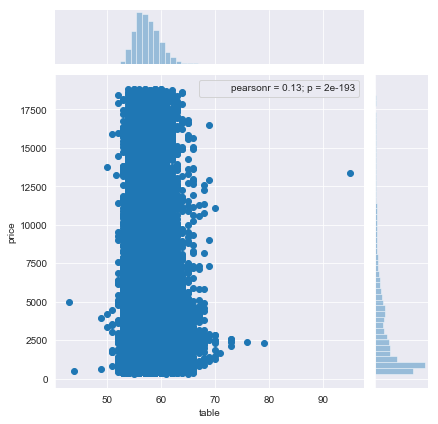

In [89]:
p = sns.jointplot(x='table', y='price', data=df)
p.annotate(stats.pearsonr)

<font size="5">Let's understand what the depth values mean.</font>
<p>Depth is the distance from the table to the point of the diamond</p>
<font size="3">"Tables are measured in percentages. Dividing the width of the table by the overall width of the diamond, you can find the table percentage. Anything between 50 and 69 percent is considered alright. However, the most ideal table percentages are between 60 and 54 percent."</font>
<p></p>
<font size="5">We can see that our depth has a normal distribution and the price of the diamond varies for the same depth. Our regression line also shows that there is a slight decrease in price as depth percentage increases.</font>
<p></p>
<a href="https://www.brilliance.com/diamonds/ideal-depth-table-round-cut-diamonds">Information from Brilliance</a>

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(2, 10)

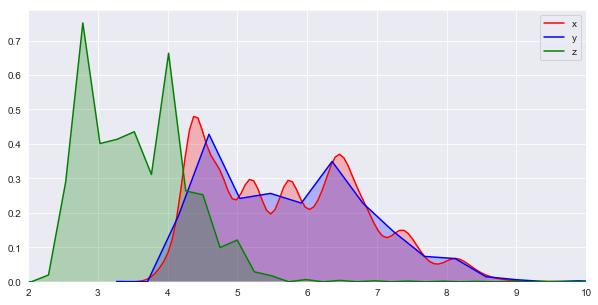

In [90]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df['x'], shade=True, color='red')
sns.kdeplot(data=df['y'], shade=True, color='blue')
sns.kdeplot(data=df['z'], shade=True, color='green')
plt.xlim(2,10)

<font size="5">Feature Engineering</font>

<font>Let's create a volume column from our dimension features.</font>

In [91]:
df['volume'] = df['x']*df['y']*df['z']

In [92]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0, 40000)

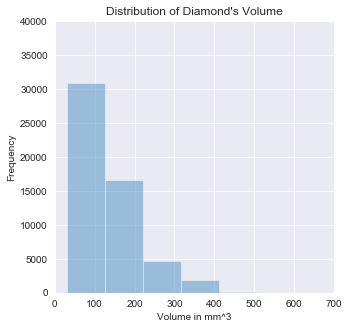

In [93]:
plt.figure(figsize=(5,5))
sns.distplot(df['volume'], bins=40, kde=False)
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0, 700)
plt.ylim(0, 40000)

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ethan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


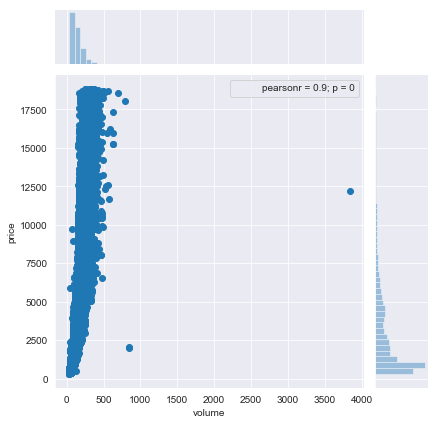

In [94]:
p = sns.jointplot(df['volume'], df['price'])
p.annotate(stats.pearsonr)

The relationship between volume and price seems to be linear.

#### Drop x, y, z.

In [95]:
df = df.drop(['x', 'y', 'z'], axis=1)

In [96]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### Feature Encoding

In [97]:
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

df['cut'] = le_cut.fit_transform(df['cut'])
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])

In [98]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


### Feature Scaling

In [99]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling Algorithms

In [101]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 'Ridge Regression', 
          'GradientBoosting Regression', 'RandomForest Regression', 'KNeighbours Regression']

#### Linear Regression

In [102]:
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
accuracies = cross_val_score(lm, X_train, y_train, cv=5, verbose=1)
pred = lm.predict(X_test)

print("LINEAR REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

MAE = np.mean(abs(y_test - pred))
MSE = np.mean((y_test - pred)**2)
RMSE = np.sqrt(np.mean((y_test - pred)**2))
MAPE = 100 * np.mean(abs(y_test - pred)/y_test)
MPE = 100 * np.mean((y_test - pred)/y_test)

print('')
print('MAE: %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('MPE: %.4f' % MPE)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

LINEAR REGRESSION
R^2 Accuracy: 0.8805
[0.88182533 0.87216428 0.88499376 0.88130877 0.87152786]

MAE: 933.9201
MSE: 1893934.5254
RMSE: 1376.2029
MAPE: 44.6676
MPE: 11.1036

MAE: 933.9201
MSE: 1893934.5254
RMSE: 1376.2029


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Lasso Regression

In [103]:
clf_la = Lasso(normalize=True)
clf_la.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_la, X_train, y_train, cv=5, verbose=1)
pred = clf_la.predict(X_test)

print("LASSO REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

MAE = np.mean(abs(y_test - pred))
MSE = np.mean((y_test - pred)**2)
RMSE = np.sqrt(np.mean((y_test - pred)**2))
MAPE = 100 * np.mean(abs(y_test - pred)/y_test)
MPE = 100 * np.mean((y_test - pred)/y_test)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

LASSO REGRESSION
R^2 Accuracy: 0.8670
[0.86812799 0.85792484 0.87492447 0.86970572 0.84187803]

MAE: 911.3609
MSE: 2107856.1784
RMSE: 1451.8458


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Adabosst Regression

In [104]:
clf_la = AdaBoostRegressor(n_estimators=1000)
clf_la.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_la, X_train, y_train, cv=5, verbose=1)
pred = clf_la.predict(X_test)

print("Adabosst REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

Adabosst REGRESSION
R^2 Accuracy: 0.9020
[0.88943157 0.88564429 0.86915839 0.86867566 0.8971654 ]

MAE: 907.5388
MSE: 1553663.2026
RMSE: 1246.4603


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.8s finished


#### Ridge Regression

In [105]:
clf_ada = Ridge(normalize=True)
clf_ada.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_ada, X_train, y_train, cv=5, verbose=1)
pred = clf_ada.predict(X_test)

print("Adabosst REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

Adabosst REGRESSION
R^2 Accuracy: 0.7539
[0.75167536 0.73940817 0.76403775 0.75159617 0.73817964]

MAE: 1329.7294
MSE: 3901091.7186
RMSE: 1975.1182


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Gradient Boost Regression

In [106]:
clf_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, 
                                     random_state=0, loss='ls',verbose = 1)
clf_grad.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_grad, X_train, y_train, cv=5, verbose=1)
pred = clf_grad.predict(X_test)

print("GRADIENT BOOST REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

      Iter       Train Loss   Remaining Time 
         1    14068168.2972            0.30s
         2    12479622.6181            0.24s
         3    11152429.5009            0.26s
         4     9965779.0530            0.26s
         5     8996008.5708            0.27s
         6     8115031.3618            0.27s
         7     7391127.9252            0.25s
         8     6761423.7434            0.25s
         9     6196480.5314            0.25s
        10     5727359.5715            0.24s
        20     3193817.5058            0.21s
        30     2387207.3044            0.18s
        40     2095369.2204            0.16s
        50     1916622.0840            0.13s
        60     1782022.3428            0.10s
        70     1679017.7320            0.08s
        80     1599536.5392            0.05s
        90     1537535.5760            0.03s
       100     1488100.2831            0.00s
      Iter       Train Loss   Remaining Time 
         1    13993616.8506            0.20s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


#### Random Forrest Regression

In [107]:
clf_rand = RandomForestRegressor()
clf_rand.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_rand, X_train, y_train, cv=5, verbose=1)
pred = clf_rand.predict(X_test)

print("RANDOM FOREST REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))

RANDOM FOREST REGRESSION
R^2 Accuracy: 0.9797
[0.97676726 0.97797172 0.97860497 0.9775374  0.97840776]

MAE: 292.4258
MSE: 322154.4961
RMSE: 567.5866


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


Tuning Parameters

In [108]:
param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [2, 5, 8, 10], 
              'min_samples_split': [2, 5, 8], 'max_features': ['auto', 'log2'], 'n_jobs':[-1]}
rand_grid = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=1)
rand_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 100, 1000], 'max_depth': [2, 5, 8, 10], 'min_samples_split': [2, 5, 8], 'max_features': ['auto', 'log2'], 'n_jobs': [-1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=1)

In [109]:
pred = rand_grid.predict(X_test)

print("RANDOM FOREST REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

RANDOM FOREST REGRESSION
R^2 Accuracy: 0.9795
[0.97676726 0.97797172 0.97860497 0.9775374  0.97840776]

MAE: 302.9683
MSE: 324248.9834
RMSE: 569.4286


#### KNearestNeighbor Regression

In [110]:
clf_KNN = KNeighborsRegressor()
clf_KNN.fit(X=X_train, y=y_train)
accuracies = cross_val_score(clf_KNN, X_train, y_train, cv=5, verbose=1)
pred = clf_KNN.predict(X_test)

print("RANDOM FOREST REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


RANDOM FOREST REGRESSION
R^2 Accuracy: 0.9550
[0.95566785 0.94757868 0.9548724  0.95401153 0.95524021]

MAE: 445.7527
MSE: 712930.3606
RMSE: 844.3520


Tuning Parameters

In [111]:
neighbors = []
for x in range(0, 51, 5):
    if (x != 0):
        neighbors.append(x)
        
param_grid = {'n_neighbors':neighbors, 'n_jobs':[-1]}
knn_grid = RandomizedSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=1)
knn_grid.fit(X_train, y_train)
pred = knn_grid.predict(X_test)

print("RANDOM FOREST REGRESSION")
print("R^2 Accuracy: %.4f" % r2_score(y_test, pred))
print(accuracies)

print('')
print('MAE: %.4f' % mean_absolute_error(y_test, pred))
print('MSE: %.4f' % mean_squared_error(y_test, pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, pred)))
R2_Scores.append(r2_score(y_test, pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.0s finished


RANDOM FOREST REGRESSION
R^2 Accuracy: 0.9550
[0.95566785 0.94757868 0.9548724  0.95401153 0.95524021]

MAE: 445.7527
MSE: 712930.3606
RMSE: 844.3520


In [113]:
scores_df = pd.DataFrame({'Algorithms' : models, 'R2-Scores' : R2_Scores})
scores_df

,Algorithms,R2-Scores
0,Linear Regression,0.880539
1,Lasso Regression,0.867045
2,AdaBoost Regression,0.902001
3,Ridge Regression,0.753935
4,GradientBoosting Regression,0.903929
5,RandomForest Regression,0.979548
6,KNeighbours Regression,0.955031


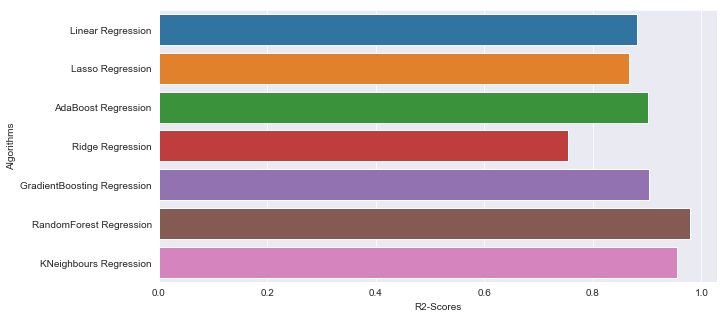

In [117]:
plt.figure(figsize=(10, 5))
sns.barplot(x='R2-Scores', y='Algorithms', data=scores_df)